# CO2 Emission Predictor From A Newly Manufactured Car Using Multiple Regression.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

# Making New Dataframe Of Selected columns

In [5]:
cdf=df[["ENGINESIZE","CO2EMISSIONS","FUELCONSUMPTION_COMB","CYLINDERS"]]
cdf.head()

,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB,CYLINDERS
0,2.0,196,8.5,4
1,2.4,221,9.6,4
2,1.5,136,5.9,4
3,3.5,255,11.1,6
4,3.5,244,10.6,6


# Data Visualization

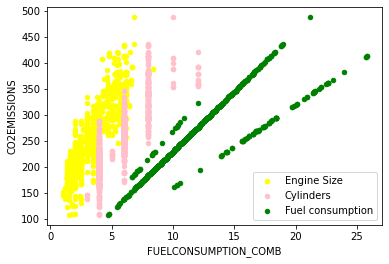

In [19]:
ax=cdf.plot(kind="scatter",x="ENGINESIZE",y="CO2EMISSIONS",color="yellow",label="Engine Size")

cdf.plot(kind="scatter",x="CYLINDERS",y="CO2EMISSIONS",color="pink",label="Cylinders", ax=ax)

cdf.plot(kind="scatter",x="FUELCONSUMPTION_COMB",y="CO2EMISSIONS",color="green",label="Fuel consumption",ax=ax)

plt.show()


# train/test dataset


In [6]:
msk=np.random.rand(len(df))<0.8

train=cdf[msk]
test=cdf[~msk]

In [7]:
trainx=train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
trainy=train[["CO2EMISSIONS"]]

testx=test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
testy=test[["CO2EMISSIONS"]]

# Multiple Linear Regression Modeling

# Training

In [8]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(trainx,trainy)

print("coefficient (Theta):",regr.coef_)
print("Intercept (b):",regr.intercept_)

coefficient (Theta): [[9.75357502 8.82227588 9.22046743]]
Intercept (b): [65.33612753]


# TESTING

In [13]:

test_y_hat=regr.predict(testx)
test_y_hat[0:5]


array([[198.50635426],
       [250.14425016],
       [256.70519888],
       [261.3154326 ],
       [248.30015668]])

# Evaluation

In [15]:
print("Mean Absolute Error:%.2f"%np.mean(np.absolute(test_y_hat-testy)))   #MAE

print("Residual Sum Of Squares:%.2f"%np.mean((test_y_hat-testy)**2))       #MSE

print("Accuracy:%.2f"%regr.score(testx,testy))

Mean Absolute Error:14.96
Residual Sum Of Squares:456.15
Accuracy:0.88


# Predction

In [16]:
new=[[4,4,5.5]] #enginesize,cylinders,fuelconsumption

v1=regr.predict(new)

print("Car will Emit {} amount of CO2".format(v1[0][0]))

Car will Emit 190.3521020174424 amount of CO2
